# Get Uniprot IDS for ebola
## Christian Roncal Cmsc499a Dr. Leiserson

In [1]:
import os 
import pandas as pd
import numpy as np
from utils import *
import re

In [2]:
os.listdir()

['full_train.csv',
 'make_matrix.py',
 'fullmatrix_getprots.ipynb',
 'utils.py',
 'hepatitis_c_processing.ipynb',
 'hepc_interactions_full.csv',
 'dataprocessing_playground.ipynb',
 'ebola_interactions_full.csv',
 'makesingletasks.ipynb',
 'classes.pkl',
 'influenza',
 'ebola',
 'influenza_a_processing-Copy1.ipynb',
 'flustrains.txt',
 '.ipynb_checkpoints',
 'flu_interactions_full.csv',
 'D.pkl',
 'hepc',
 '__pycache__',
 'hepc.fasta',
 'uniprots',
 'ebola_processing.ipynb',
 'conjoint_featurizer_playground.ipynb']

# 1 load data

In [3]:
ebola_csv = './ebola/ebola_phi.csv'

In [4]:
eboladf = pd.read_csv(ebola_csv)

In [5]:
eboladf.head()

,Pathogen,Taxonomy ID,virusUprot,Pathogen Protein,humanUprot,Human Protein,Experimental Method,Pubmed ID
0,Zaire Ebolavirus STRAIN MAYINGA,128952,Q05128,VP40_EBOZM,P46934,NEDD4_HUMAN,filter binding,11095724
1,Zaire Ebolavirus STRAIN MAYINGA,128952,Q05127,VP35_EBOZM,Q96FJ2,DYL2_HUMAN,tandem affinity purification,22810585
2,Zaire Ebolavirus STRAIN MAYINGA,128952,Q05127,VP35_EBOZM,P22626,ROA2_HUMAN,tandem affinity purification,22810585
3,Zaire Ebolavirus STRAIN MAYINGA,128952,Q05127,VP35_EBOZM,O95816,BAG2_HUMAN,tandem affinity purification,22810585
4,Zaire Ebolavirus STRAIN MAYINGA,128952,Q05127,VP35_EBOZM,P12036,NFH_HUMAN,tandem affinity purification,22810585


In [6]:
len(eboladf['Pathogen'].unique()) 

4

In [7]:
eboladf['Pathogen'].unique()

array(['Zaire Ebolavirus STRAIN MAYINGA',
       'Reston ebolavirus STRAIN Reston (1989)',
       'Zaire ebolavirus STRAIN 1995', 'Zaire Ebolavirus '], dtype=object)

In [8]:
len(eboladf['Human Protein'].unique())

151

All of these seem relevant

# 3 Get virus|human uniprots of interactions

get a df with cols virus uniprot and human uniprot for matrix interaction processing.

In [9]:
# drop cols we don't need
eboladf = removeObsoletes(eboladf[['virusUprot', 'humanUprot']])

In [10]:
eboladf.head()

,virusUprot,humanUprot
0,Q05128,P46934
1,Q05127,Q96FJ2
2,Q05127,P22626
3,Q05127,O95816
4,Q05127,P12036


In [11]:
# save current interaction matrix
eboladf.to_csv('ebola_interactions_full.csv', index=False)

In [12]:
pd.read_csv('ebola_interactions_full.csv').head()

,virusUprot,humanUprot
0,Q05128,P46934
1,Q05127,Q96FJ2
2,Q05127,P22626
3,Q05127,O95816
4,Q05127,P12036


In [13]:
ranked_eboladf = rank_by_interactions(eboladf, 1)

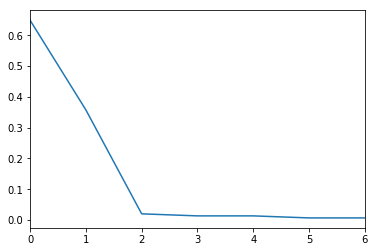

In [17]:
ranked_eboladf['ratio'].plot.line()

In [15]:
ranked_eboladf['ratio'].mean()

0.15231788079470204